<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 2: Overview of Programming languages and Systems</h1>
</div>


## Learning Objectives

* Programming languages
  - Understand the ways that programming languages differ, such as on level of abstraction, whether it is interpreted or compiled, how type-checking is done, what paradigms it uses, and how it does memory management
  - Describe the differences between a high level and low level programming language
  - Describe the differences between an interpreted and compiled language
  - Describe the differences between a static and dynamically typed language
  - Know that there are different programming paradigms such as imperative and functional
  - Describe the difference between manual memory management and garbage collection
  - Be able to identify the the properties of a particular language such as rust.

* Systems Concepts
  - Understand that at a high level the key components of a computer are the CPU, memory, and I/O
  - Understand that files and code are just data encoded in different ways
  - Be able to convert between different bases, such as decimal, binary, and hexadecimal

## Various levels

* Native code

* Assembler
  - pros: as fine control as in native code
  - cons: not portable


* High level
  - various levels of closeness to the architecture: from C to Prolog
  - efficiency:
    - varies
    - could optimize better
  - pros:
    - very portable
    - easier to build large projects
  - cons:
    - some languages are resource–inefficient

## Assembly Language Examples
`  ARM                          X86
. text                       section .text
.global _start                 global _start
_start:                      section .data
   mov r0, #1                msg db  'Hello, world!',0xa
   ldr r1, =message          len equ 0xe
   ldr r2, =len              section .text
   mov r7, #4                _start:
   swi 0                     mov edx,len ;message length
   mov r7, #1                mov ecx,msg ;message to write
                             mov ebx,1   ;file descriptor (stdout)
.data.                       mov eax,4   ;system call number (sys_write)
message:                     int 0x80    ;call kernel
   .asciz "hello world!\n"   mov ebx,0   ;process' exit code
len = .-message.             mov eax,1   ;system call number (sys_exit)
                             int 0x80    ;call kernel - this interrupt won't return
`

## Interpreted vs. compiled

Interpreted:
* An application (*interpreter*) reads commands one by one and executes them.
* One step process to run an application:
  - `python hello.py`

("Fully") Compiled:
 * Translated to native code by *compiler*
 * Usually more efficient
 * Two steps to execute:
   1. Compile (Rust: `rustc hello.rs`)
   2. Run (Rust: `./hello`)
   
Compiled to intermediate format:
 * Example: Java
   - Portable intermediate format
   - Needs another application, Java virtual machine, that knows how to interpret it
   
JIT is an interesting wrinkle in that it can take interpreted and intermediate format languages and compile them down to machine code.

## Type checking: static vs. dynamic

Dynamic (e.g., Python):
* checks if an object can be used for specific operation during runtime
* pros:
  - don't have to specify the type of object
  - procedures can work for various types
  - faster or no compilation
* cons:
  - slower at runtime
  - problems are detected late



In [1]:
def add(x,y):
    return x + y

print(add(2,2))
print(add("a","b"))
print(add(2,"b"))

4
ab


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [4]:
import typing
def add(x:str, y:str) -> str:
    return x + y
print(add(2,2))
print(add("ab", "cd"))
#print(add(2,"n"))

4
abcd


* Use mypy as a type checker before running your programs  
* `pip3 install mypy`

## Type checking: static vs. dynamic

Static (e.g, C++, Rust, OCaml, Java):
* checks if types of objects are as desired
* pros:
  - faster at runtime
  - type mismatch detected early
* cons:
  - often need to be explicit with the type
  - making procedures generic may be difficult
  - potentially slower compilation



C++:
```C++
int add(int x, int y) {
    return x + y;
}
```

Rust:
```rust
fn add(x:i32, y:i32) -> i32 {
    x + y
}
```

## Type checking: static vs. dynamic

**Note:** some languages are smart and you don't have to always specify types (e.g., OCaml, Rust)

Rust:
```rust
let x : i32 = 7;
let y = 3;
let z = x * y;
```

## Various programming paradigms
* Imperative
* Functional
* Object-oriented
* Declarative / programming in logic

```
def factorial(N):
    ret = 1
    for i in range(N):
        ret = ret * i
    return ret
```

```
(define (factorial n) (cond ((= n 0) 1) 
                            (t (* n (factorial (- n 1)))))) 
```

```
class Factorial {
   private:
     int64 value;
   public:
     int64 factorial(int input) {
        int64 temp = 1;
        for(int i=1; i<=input; i++) {
            temp = temp * i;
        }
        value = temp
     }
     int64 get_factorial() {
        return value;
     }
}
```

```
factorial(0,1).
factorial(N,M) :-
N>0,
N1 is N-1,
factorial(N1, M1),
M is N*M1.
```

## Memory management: manual vs. garbage collection

Manual:
* Need to ask for memory and return it, more explicitly
* pros:
  - more efficient
  - better in real–time applications
* cons:
  - more work for the programmer
  - more prone to errors

Garbage collection:
* Memory freed automatically
* pros:
  - less work for the programmer
  - more difficult to make mistakes
* cons:
  - less efficient
  - can lead to sudden slowdowns

Rust has many features to avoid memory management errors

## Rust

* high–level

* compiled

* static type checking

* <b> manual memory management </b>

## Most important difference between Python and Rust?

<div align="center">
    <h3>Braces, <tt>{  }</tt>, for code formatting!</h3>
    😃😃😃
</div>

* How do we denote blocks of code?

  - Python: indentation
  - Rust: `{...}`

```rust
fn hi() {
    println!("Hello!");
    println!("How are you?");
}
```

* Don't be afraid of braces!!! You'll encounter them in C, C++, Java, Javascript, PHP, Rust, ...

## Computers are just like us!

Think about what you would do with the following text:

My office hours are today at 1:30pm

Ble alla i ddod o hyd i siop goffi dda

www.google.com

## Structure of an executable

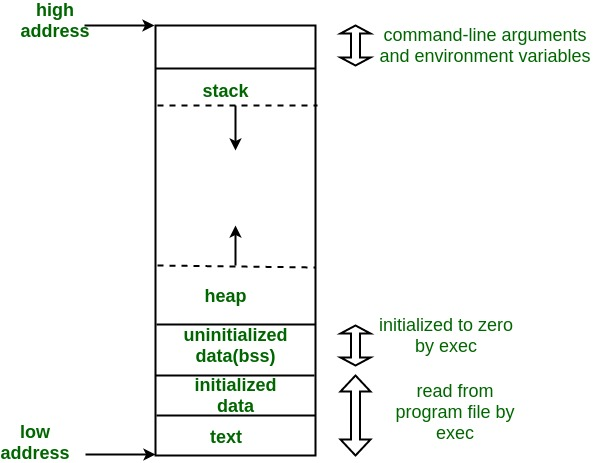

## An example of terrible unsafe programming in C
```
#include <signal.h>
#include <stdio.h>
#include <string.h>
#include <stdlib.h>
int main(){
    char loop_bool[20];
    char secretString[20];
    char givenString[20];
    char x;
    int i, ret;

    memset(&loop_bool, 0, 20);
    for (i=0;i<19;i++) {
      x = 'a' + random() % 26; 
      secretString[i] = x;
    }
    printf("secretString: %s\n", secretString);
    while (!loop_bool[0]) { 
        gets(givenString);
        ret = strncmp(secretString, givenString, 20);
        if (0 == ret) {
            printf("SUCCESS!\n");
	    break;
	}else if (ret < 0){
	    printf("LESS!\n");
	} else {
	    printf("MORE!\n");
        }
        printf("secretString: %s\n", secretString);
    }
    printf("secretString: %s\n", secretString);
    printf("givenString: %s\n", givenString);
    return 0;
}
```

### Who are these people?
* Guido Van Rossum
* Graydon Hoare
* Bjarne Stroustrup
* James Gosling
* Brendan Eich
* Brian Kernighan and Dennis Ritchie

### Who are these people?
* Guido Van Rossum  --  Python
* Graydon Hoare  --  Rust
* Bjarne Stroustrup  -- C++
* James Gosling  --  Java
* Brendan Eich  --  Javascript
* Brian Kernighan and Dennis Ritchie  -- C

<div align="center">
    <h1>Basic System Concepts</h1>
</div>


# 1. Numbering Systems
# 2. The Von Neumann Architecture
# 3. Memory Hierarchy and Memory Concepts
# 4. Trends, Sizes and Costs

# Numbering Systems

* Decimal (0-9) e.g. 1724
* Binary (0-1) e.g. 0b011000 (24 decimal)
* Octal (0-7) e.g. 0o131 (89 decimal)
* Hexadecimal (0-9, A-F) e.g 0x13F (319 decimal)

## Converting between numbering systems

### For any base b to decimal.  Assume number C with digits $C_kC_{k-1}...C_2C_1C_0$
$\large D = \sum_{i=0}^{k} C_i * b^i$

### Between octal and binary
Every octal digit corresponds to exactly 3 binary digits and the reverse.  For example 0o34 = 0b011_100.  Traverse numbers right to left and prepend with 0s if necessary.

### Between hexadecimal and binary
Every hexadecimal digit corresponds to exactly 4 binary digits and the reverse.  For example 0x3A = 0b0011_1010.  Traverse numbers right to left and prepend with 0s if necessary.

### Between decimal and binary (or any base b)
More complicated.  Divide repeatedly by 2 and keep the remainder as the next most significant binary digit.  Stop when the division returns 0.

```
i = 0 
while D > 0:
  C[i] = D % 2 # or any base b
  D = D // 2 # or any base b
  i += 1
```

### What about between decimal and octal/hexadecimal
You can use the same logic as for binary or convert to binary and then use the binary to octal/hexadecimal simple conversions

# The Von Neuman Architecture
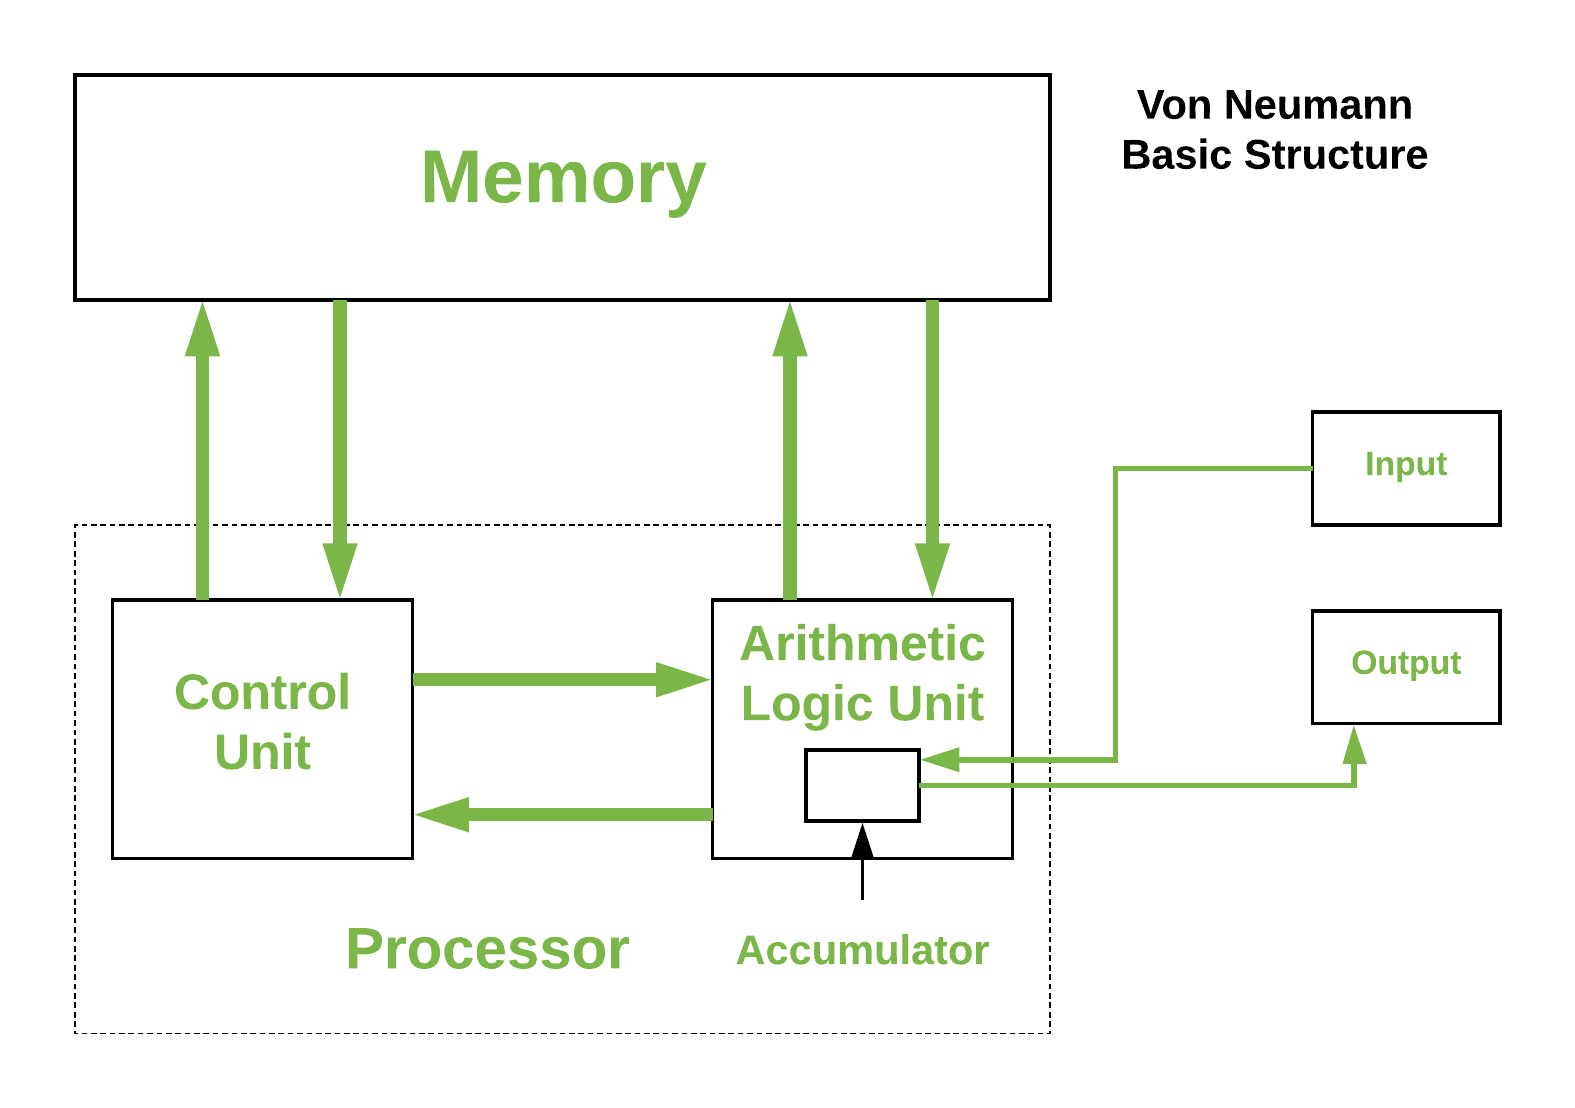

* Processor (CPU)
* Memory
* I/O

### Also known as the stored program architecture

Both data and program stored in memory and it's just convention which parts of memory contain instructions and which ones contain variables.

Two very special registers in the processor: Program Counter (PC) and Stack Pointer (SP)

PC:  Points to the next instruction.  Auto-increments by one when instruction is executed with the exception of branch and jmp instructions that explicitly modify it.   Branch instructions used in loops and conditional statements.  Jmp instructions used in function calls. 

SP: Points to beginning of state (parameters, local variables, return address, old stackpointer etc) for current function call.



## In depth look of Processor operation
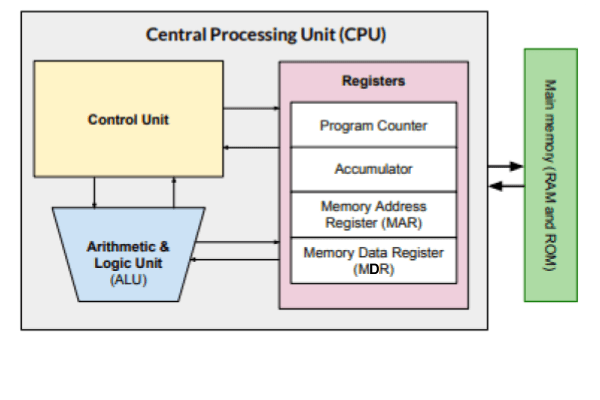

Use the Program Counter to fetch the next instruction.  After fetching you have to decode it, and subsequently to execute it.

Decoding instructions requires that you split the instruction number to the opcode (telling you what to do) and the operands (telling what data to operate one)

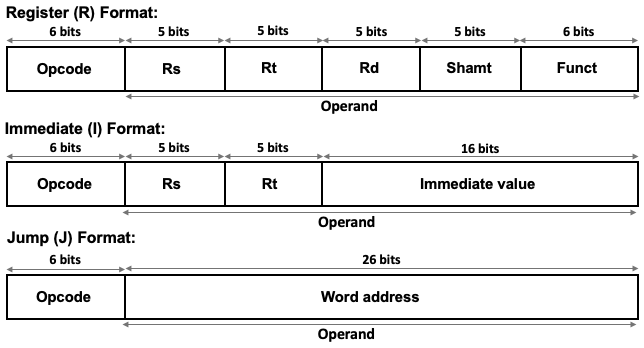

### The time cost of operations

* Executing an instruction ~ 0.5 ns
* Getting a value (4 bytes) from L1 cache ~1 ns
* Branch mispredict ~3 ns
* Getting a value from L2 cache ~4 ns
* Send 1Kbyte of data over 1Gbps network (just send not arrive) ~ 16 ns
* Get a value from main memory ~100 ns
* Read 1MB from main memory sequentially ~1000 ns
* Compress 1Kbyte (in L1 cache) with zippy ~2000 ns
* Read 1MB from SSD ~49,000 us
* Send a ping pong packet inside a datacenter ~500,000 ns
* Read 1Mbyte from HDD ~825,000 ns
* Do an HDD seek ~2,000,000 ns
* Send a packet from US to Europe and back ~150,000,000 ns

https://samwho.dev/numbers/


# The memory hierarchy and memory concepts

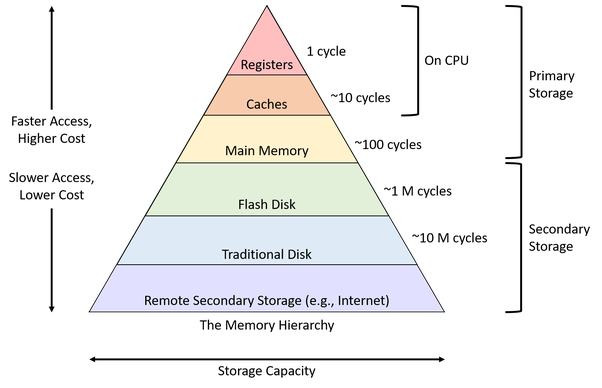

## How do caches work?

Each address is split into a tag, and index and an offset
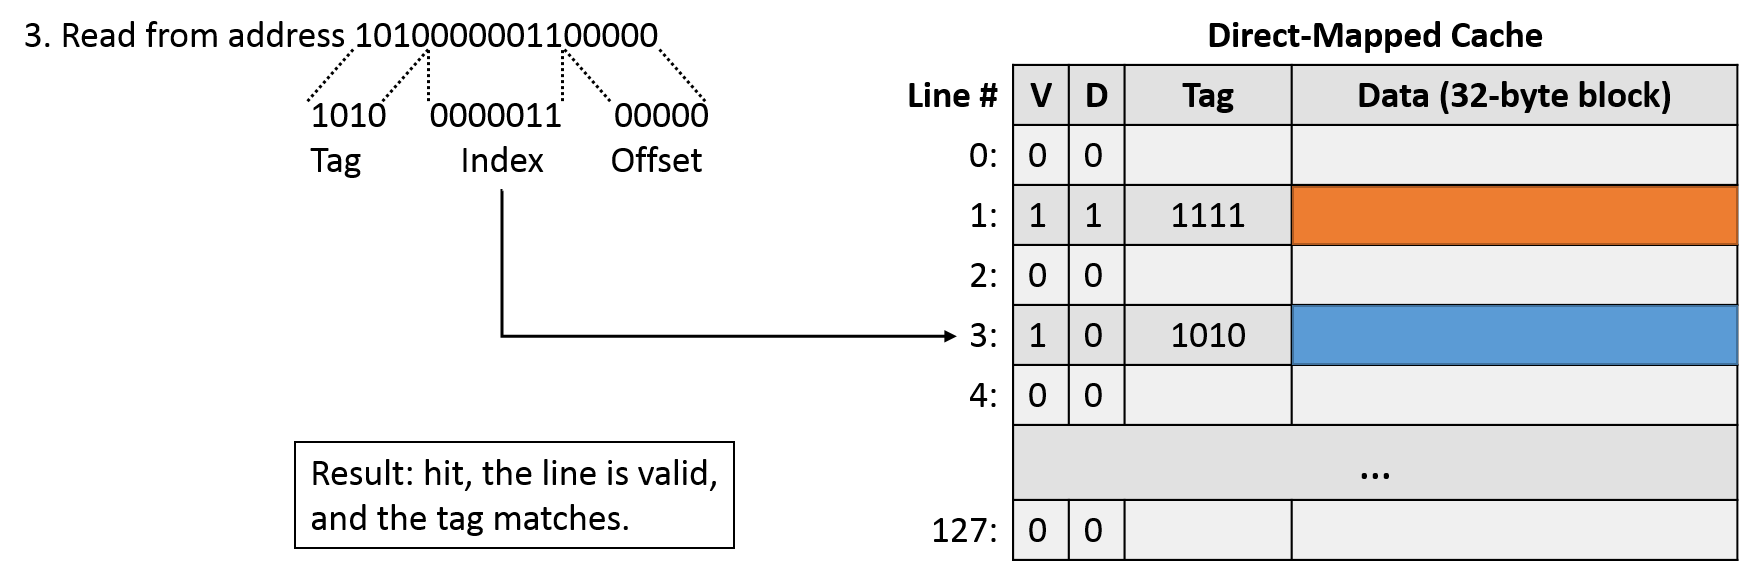

The index tells you where in the cache to look for the data.  The tag (if it matches) tells you whether the data you are looking for is present or not.  The offset tells you which part of the line to return to the processor.   Caches fetch data from memory in larger chunks to optimize latency (64 bytes is quite common).

Caches can be one of the following:

* Direct mapped: Each address can be in a single cache line
* Fully Associative: Each address can be anywhere in the cache
* Set associative: Something in between 


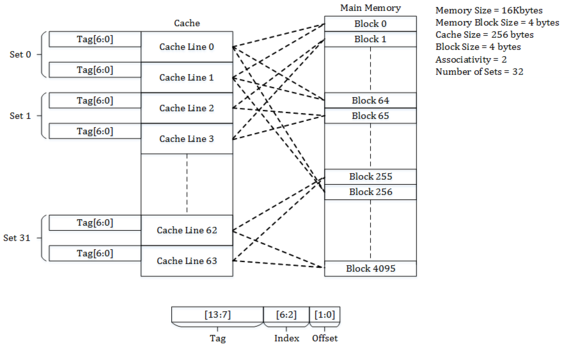

## Virtual Memory, Page Tables and TLBs

Every program thinks it can access every possible memory address.  And there has to exist some security to prevent one program from modifying the memory occupied by another.  The mechanism for that is virtual memory and address translation

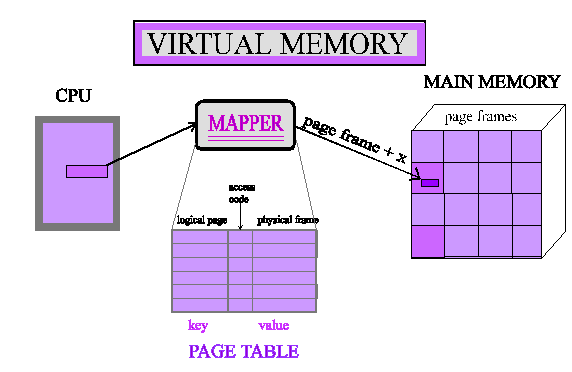

## A more in depth look

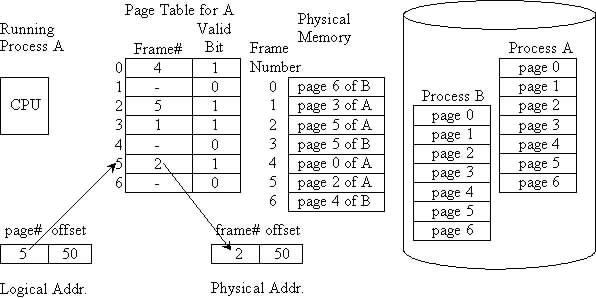

A part of memory is reserved for the operating system and amongst other things it will contain the page tables for every process running on the computer.  When a request misses the cache and has to be fetched from main memory it will be translated using the page table before accessing the actual physical memory.

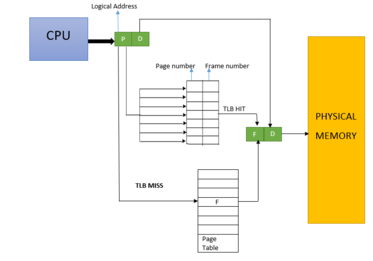

And of course to make translations fast a cache of the page table is used inside the processor called the TLB.

# Trends, Sizes and Costs

### Costs

* GPU: \\$10000-\$30000
* CPU: \\$500-\$1000
* DRAM: \\$5-\$10/Gbyte
* Flash: \\$0.05-\$.01/Gbyte
* Disk: \\$0.01-\$0.02/Gbyte
* Network: \$100 for 10Gbps NIC. Difficult to price network as it depends on where
* Network Transfer: \\$0.02-\$0.14/Gbyte

### Sizes

For a typical server

2 X 2Ghz Intel/ADM processors  
32-128Gbytes of memory  
10-100 Tbytes of storage  
10Gbps Network card    
1-2 KWatts of power

For a typical datacenter

100K - 1M sercers  
1+ MWatt of power
1-10 Pbbs of internal bandwidth, 1-10 Tbps of Internet facing bandwidth
1-10 Exabytes of storage

### Trends

Computers grow fast so we have written some rules of thumb about them

Storage density doubles every 12 months (Kryder's law)  
Consumer Bandwidth doubles every 20 months (Nielsen's law)  
CPU capacity doubles every 18 months (Moore's law)  
The value of a Network increases with the square of its members (Metcalfe's law)  
Every 10 years the computing paradigm changes (Bell's law)